<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

## Lab on NNDL Part 1: Tensorflow Basic

### Tensors

Tensors are multi-dimensional arrays with a uniform type

##Question 1


### Create a rank-0 tensor
- A "scalar" is called "rank-0" tensor
- the tensor should contain value 99.99

In [1]:
import tensorflow as tf

In [2]:
rank_0_tensor = tf.constant(99.99)
print(rank_0_tensor)

tf.Tensor(99.99, shape=(), dtype=float32)


### Create a rank-1 tensor

- A "vector" (list) is called "rank-1" tensor [9,8,7,6,5]
- A vector has one axis

In [3]:
rank_1_tensor = tf.constant([9,8,7,6,5])
print(rank_1_tensor)

tf.Tensor([9 8 7 6 5], shape=(5,), dtype=int32)


### Add 7 to all the elements of the above created tensor
- Use Broadcasting

In [4]:
rank_1_tensor = tf.add(rank_1_tensor,7)
print(rank_1_tensor)

tf.Tensor([16 15 14 13 12], shape=(5,), dtype=int32)


### Create a rank-2 tensor
[[1, 2, 3], [ 4,5,6]]
- A "matrix"  "is called rank-2" tensor
- It has 2 axes

In [5]:
rank_2_tensor = tf.constant([[1, 2, 3], [ 4,5,6]])
print(rank_2_tensor)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)


### Change the shape of the above created tensor to shape (3,2)

In [6]:
rank_2_tensor = tf.reshape(rank_2_tensor,(3,2))
print(rank_2_tensor)

tf.Tensor(
[[1 2]
 [3 4]
 [5 6]], shape=(3, 2), dtype=int32)


### Check the dtype, number of axes and the shape of tensor

In [7]:
print(rank_2_tensor.dtype)
print(rank_2_tensor.ndim)
print(rank_2_tensor.shape)

<dtype: 'int32'>
2
(3, 2)


- Tensors can have more axes, like rank-3 or rank-4 tensor

##Lab on NNDL Part 2: Cars selling price prediction

### Data Set -
Domain: Finance, Business 
Data: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

The data contains various features of used cars.

#### Features

1. year

2. selling_price: Price at which it was sold (**Target Feature**)

3. km_driven

4. fuel

5. seller_type

6. transmission

7. Owner

8. mileage

9. engine

10. max_power

11. seats

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

##Objective

Predict the selling price of used cars based on the given features

## Steps to perform:

#### 1. Import important Libraries
#### 2. Import Dataset and exploration
#### 3. Data Pre-processing
#### 4. Training a Neural Network Model
#### 5. Evaluating the model
#### 6. Conclusion


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


### Import important libraries

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Question 1

### Load the data
- Load the data, check the shape of data

In [9]:
import numpy as np
import pandas as pd
# Initialize the random number generator
import random
random.seed(0)

# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, r2_score

# import libraries from tensorflow
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform

In [10]:
car_data_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/car_data.csv")

In [11]:
car_data_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


## Question 2

### Preprocess the data
- Convert mileage, engine and max_power to numerical by extract numerical values from the strings
- Label Encode: 'owner' column
- One Hot Encode: 'fuel','seller_type','transmission' columns
- Drop all the instances with null values

In [12]:
def numerical_values(x):
  try:
    if type(x)==str:
      return float(x.split()[0])
    else:
      return x
  except:
    return np.nan

In [13]:
car_data_df['mileage'] = car_data_df['mileage'].map(numerical_values)
car_data_df['engine'] = car_data_df['engine'].map(numerical_values)
car_data_df['max_power'] = car_data_df['max_power'].map(numerical_values)

In [14]:
car_data_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


In [15]:
o = {'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
car_data_df['owner'] = car_data_df['owner'].map(o)


In [16]:
ohe = OneHotEncoder(drop='first',sparse=False,dtype = np.int64)
cat_col = ['fuel','seller_type','transmission']
z = ohe.fit_transform(car_data_df[cat_col])
encoded_data = pd.DataFrame(z,columns=ohe.get_feature_names(cat_col))
df1 = car_data_df.drop(columns=cat_col,axis=1)
final_df = pd.concat([df1,encoded_data],axis=1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          8128 non-null   int64  
 1   selling_price                 8128 non-null   int64  
 2   km_driven                     8128 non-null   int64  
 3   owner                         8128 non-null   int64  
 4   mileage                       7907 non-null   float64
 5   engine                        7907 non-null   float64
 6   max_power                     7912 non-null   float64
 7   seats                         7907 non-null   float64
 8   fuel_Diesel                   8128 non-null   int64  
 9   fuel_LPG                      8128 non-null   int64  
 10  fuel_Petrol                   8128 non-null   int64  
 11  seller_type_Individual        8128 non-null   int64  
 12  seller_type_Trustmark Dealer  8128 non-null   int64  
 13  tra

In [17]:
final_df.isnull().sum()
final_df.dropna(inplace=True)

## Question 3

### Split the data and then scale the data
- Split the data into ratio of 75:25 with random state=12
- Perform standard scaling on X_train and X_test data


In [18]:
y = final_df.pop('selling_price')
X = final_df

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
sc=StandardScaler()
sc.fit(X_train)
scaledX_train = sc.transform(X_train)
scaledX_test = sc.transform(X_test)

## Question 4

### Create a Deep Neural Network Model for Regression
- Initialize a Sequential model
- Add 3 hidden layer with activation relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Check model summary and visualize the model

In [20]:
# Initializing the sequential model
model = tf.keras.Sequential()

#input layer
model.add(tf.keras.Input(shape=(13)))

# Adding the dense layers
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.15))

# Adding the dense layers
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.15))

# Adding the dense layers
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.15))

#output layer
model.add(tf.keras.layers.Dense(1, activation='linear'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3

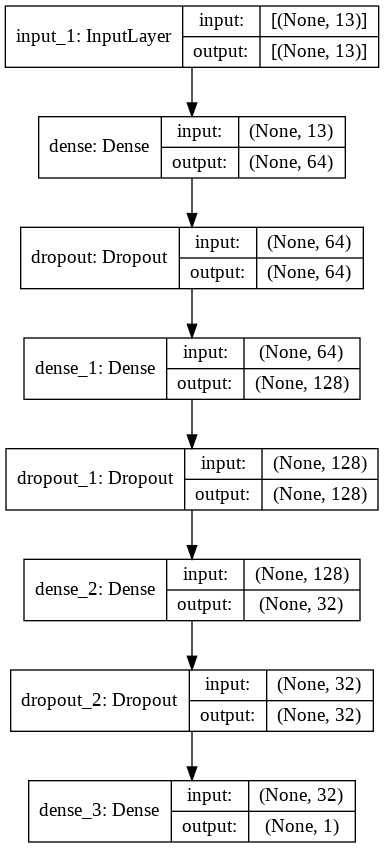

In [22]:
plot_model(model,show_layer_names=True,show_shapes=True)

## Question 5

### Compile the model

- Compile the model
- Use "adam" optimizer
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

In [23]:
# Function to calculate R_2 score to be used as metric
def r_2_score(y_true, y_pred):
  ss_res= K.sum(K.square(y_true - y_pred))
  ss_total=K.sum(K.square(y_true- K.mean(y_true)))
  return (1 - ss_res/(ss_total+0.0000000001))

In [24]:
model.compile(optimizer = 'Adam', loss = 'mean_absolute_error', metrics = r_2_score)

Other metrics can also be used to track the learning of the model:

To learn different metrics for classification and regression visit the following link:

Link: https://keras.io/api/metrics/#usage-with-compile-amp-fit

### Train your model

- epochs: 1000
- batch size: 32
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model

In [25]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, restore_best_weights=True,mode='min')
history = model.fit(scaledX_train, y_train, batch_size=32, epochs=1000, verbose=1, validation_data=(scaledX_test, y_test), callbacks=callback)

Epoch 1/1000
186/186 [==============================] - 2s 7ms/step - loss: 641584.0882 - r_2_score: -1.2852 - val_loss: 649101.8750 - val_r_2_score: -1.0174
Epoch 2/1000
186/186 [==============================] - 1s 4ms/step - loss: 628626.8697 - r_2_score: -1.0213 - val_loss: 546410.7500 - val_r_2_score: -0.6816
Epoch 3/1000
186/186 [==============================] - 1s 4ms/step - loss: 488720.0428 - r_2_score: -0.6078 - val_loss: 362316.2500 - val_r_2_score: 0.0126
Epoch 4/1000
186/186 [==============================] - 1s 4ms/step - loss: 333944.1811 - r_2_score: 0.1144 - val_loss: 277553.5000 - val_r_2_score: 0.3914
Epoch 5/1000
186/186 [==============================] - 1s 4ms/step - loss: 255260.9775 - r_2_score: 0.4327 - val_loss: 240181.7031 - val_r_2_score: 0.5604
Epoch 6/1000
186/186 [==============================] - 1s 4ms/step - loss: 240912.5506 - r_2_score: 0.5513 - val_loss: 218846.8906 - val_r_2_score: 0.6339
Epoch 7/1000
186/186 [==============================] - 1s 

## Question 6

### Evaluate the model
- Evaluate the model on test data
- Visualize the model's learning

In [27]:
model.evaluate(scaledX_test, y_test, batch_size=64)

31/31 [==============================] - 0s 2ms/step - loss: 114707.5781 - r_2_score: 0.9245


[114707.578125, 0.9245452880859375]

- Hint: The R2 score will get affected by batch size. 

**Batch Size**: Number of samples considered in one iteration

### Check the R2 score on complete test data

In [30]:
y_pred = model.predict(scaledX_test)
print(r2_score(y_test,y_pred))

0.9348399712214532


### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

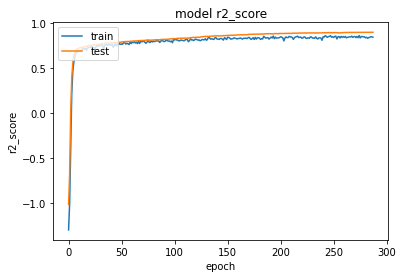

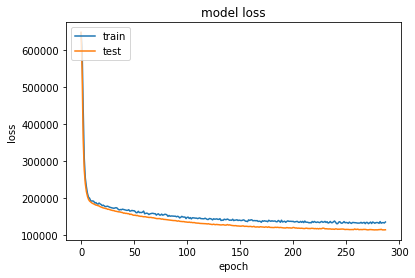

In [28]:
import matplotlib.pyplot as plt

plt.plot(history.history['r_2_score'])
plt.plot(history.history['val_r_2_score'])
plt.title('model r2_score')
plt.ylabel('r2_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##  Model tuning and Hyperparameter Tuning
## Question 7 (Optional)

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Add 3 hidden layer with activation leaky-relu (Number of neurons = 64,128,32 respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer 
- for calculating loss, use mean absolute error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 16
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model
- Add checkpoints to save the model after every epoch


### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss

### Create another Deep Neural Network Model for Regression to experiment with other hyper-parameters
- Initialize a Sequential model
- Add a batch normalization layer
- Intialize weights using HeUniform with seed = 7
- Add 4 hidden layer with activation relu (Number of neurons = 256,128,64,32 in each layer respectively)
- Add dropout layer after each hidden layer
- Add a Dense layer with one neuron as output, use activation linear
  


### Compile the model

- Compile the model
- Use "adam" optimizer with learning rate = 0.002
- for calculating loss, use mean squared error
- use R2 score (coefficient of determination) as the metric

### Train your model

- epochs: 1000
- batch size: 64
- Use test data as validation data
- Also add callback, such that if validation loss doesn't decreases consecutively 10 times, stop the training and return the weights for the previous best model



### Check the R2 score on complete test data

### Visualize model learning
- Visualize model learning using train and test r2 score
- Visualize model learning using train and test loss